In [21]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

#from pymongo import MongoClient
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd
warnings.simplefilter(action="ignore", category=FutureWarning)
import time
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

In [3]:
y = pd.read_csv("data/nairobi_data.csv")
#y = wrangle(df)
y.head()

,P2
0,17.541667
1,15.800000
2,11.420000
3,11.614167
4,17.665000


Text(0, 0.5, 'correlation coefficicent')

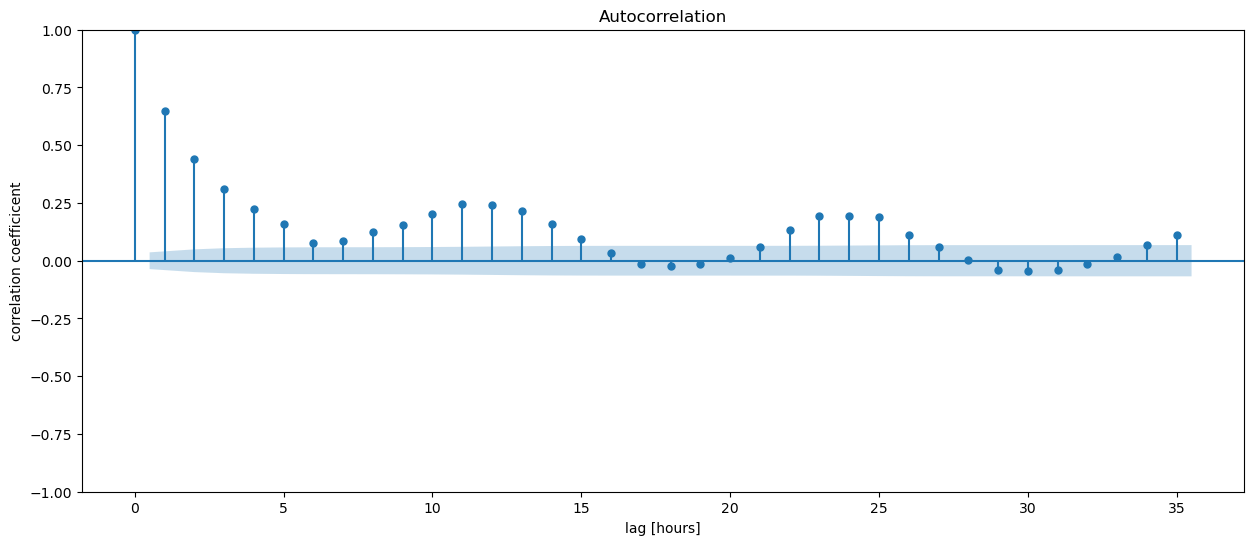

In [4]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y,ax=ax);
plt.xlabel('lag [hours]')
plt.ylabel('correlation coefficicent')

Text(0, 0.5, 'correlation coefficicent')

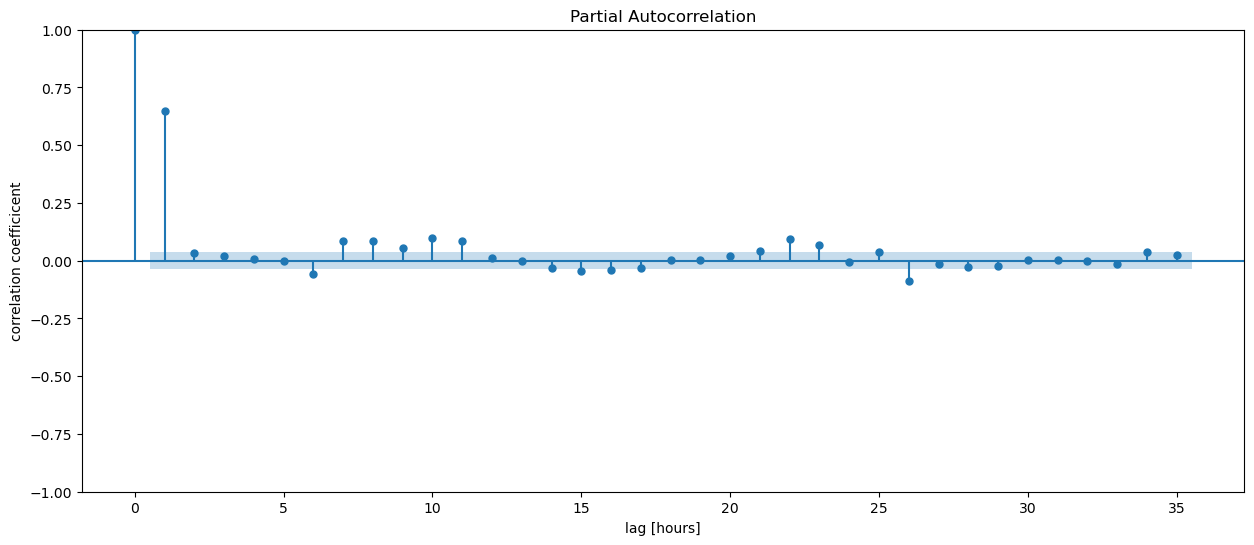

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y,ax=ax)
plt.xlabel('lag [hours]')
plt.ylabel('correlation coefficicent')

In [9]:




cutoff = int(len(y)*0.95)
y_train =  y.iloc[:cutoff]
y_test =  y.iloc[cutoff:]

In [10]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: P2    9.22
dtype: float64
Baseline MAE: 3.71


In [11]:
p_params = range(0,25,8)
q_params = range(0,3,1 )


In [18]:
# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(y_train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_train,y_pred)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)
        print(mae)

print()
print(mae_grid)

/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/ba

Trained ARIMA (0, 0, 0) in 0.19 seconds.
3.7077469694716623
Trained ARIMA (0, 0, 1) in 0.1 seconds.
2.8186777903785645


/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 2) in 0.34 seconds.
2.5445265556861068


/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 0) in 0.69 seconds.
2.3436716762253296


/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 1) in 2.17 seconds.
2.3301622879327057


/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages

Trained ARIMA (8, 0, 2) in 3.28 seconds.
2.322592274472032
Trained ARIMA (16, 0, 0) in 1.8 seconds.
2.3164149592127177


/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


Trained ARIMA (16, 0, 1) in 5.35 seconds.
2.3174445740463523


/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA (16, 0, 2) in 9.64 seconds.
2.274387130677458


/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


Trained ARIMA (24, 0, 0) in 9.47 seconds.
2.294733713212833


/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


Trained ARIMA (24, 0, 1) in 16.99 seconds.
2.297744638939303


/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA (24, 0, 2) in 22.9 seconds.
2.2976544463207076

{0: [3.7077469694716623, 2.8186777903785645, 2.5445265556861068], 8: [2.3436716762253296, 2.3301622879327057, 2.322592274472032], 16: [2.3164149592127177, 2.3174445740463523, 2.274387130677458], 24: [2.294733713212833, 2.297744638939303, 2.2976544463207076]}


In [19]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,8,16,24
0,3.7077,2.3437,2.3164,2.2947
1,2.8187,2.3302,2.3174,2.2977
2,2.5445,2.3226,2.2744,2.2977


Text(0.5, 1.0, 'ARMA Grid Search (Criterion: MAE)')

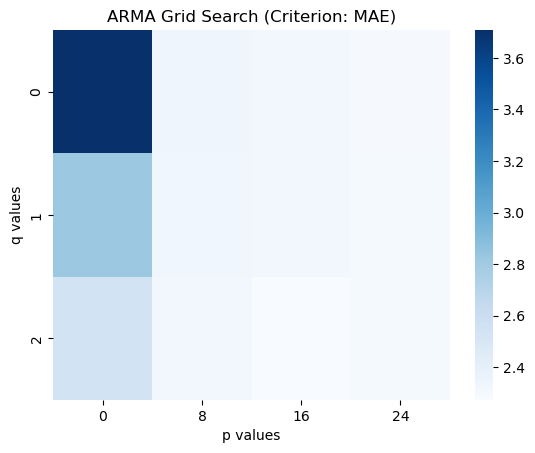

In [22]:
sns.heatmap(mae_df, cmap="Blues")
plt.xlabel('p values')
plt.ylabel('q values')
plt.title("ARMA Grid Search (Criterion: MAE)")


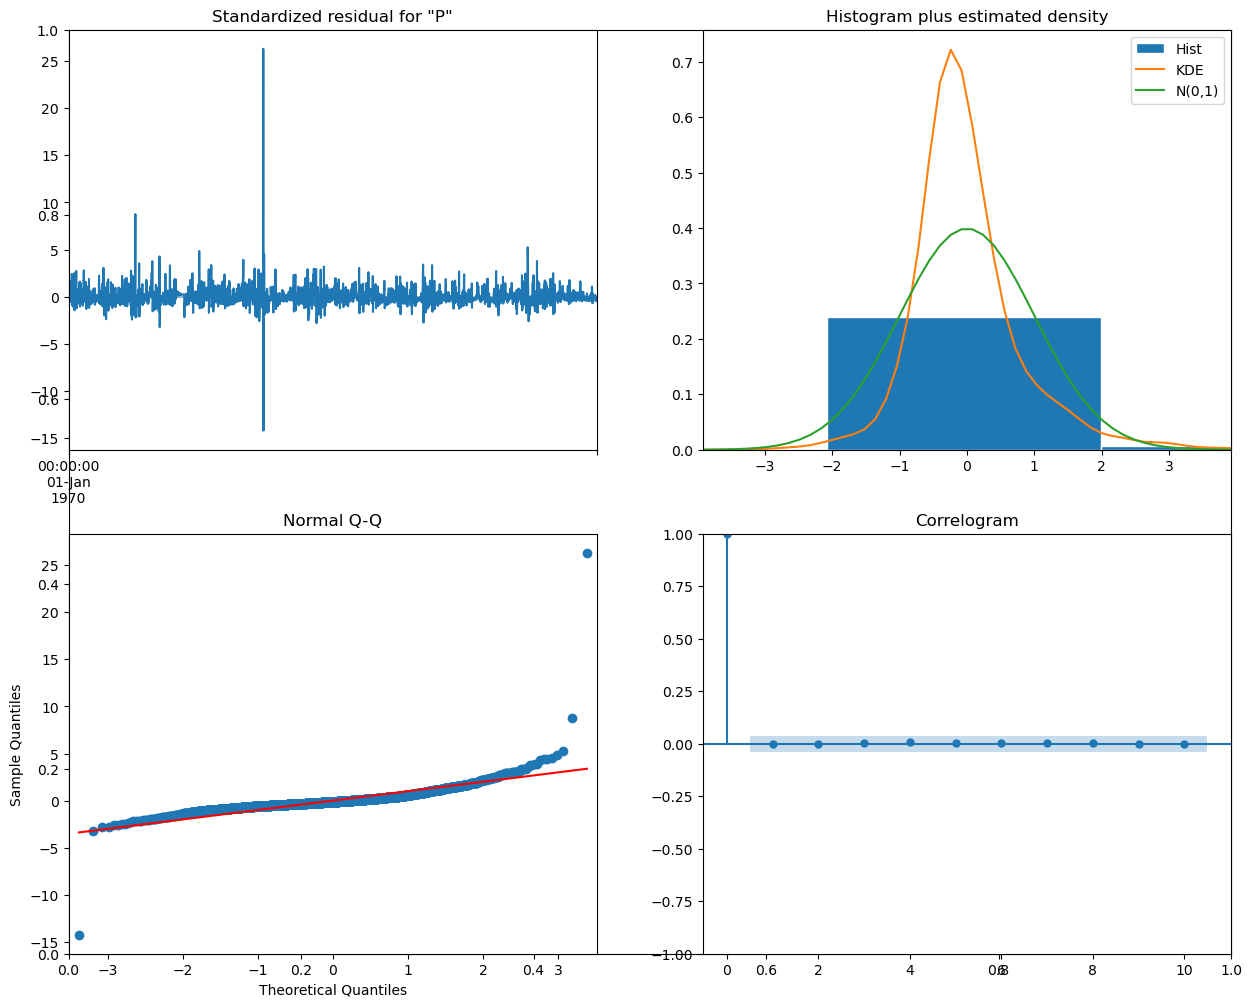

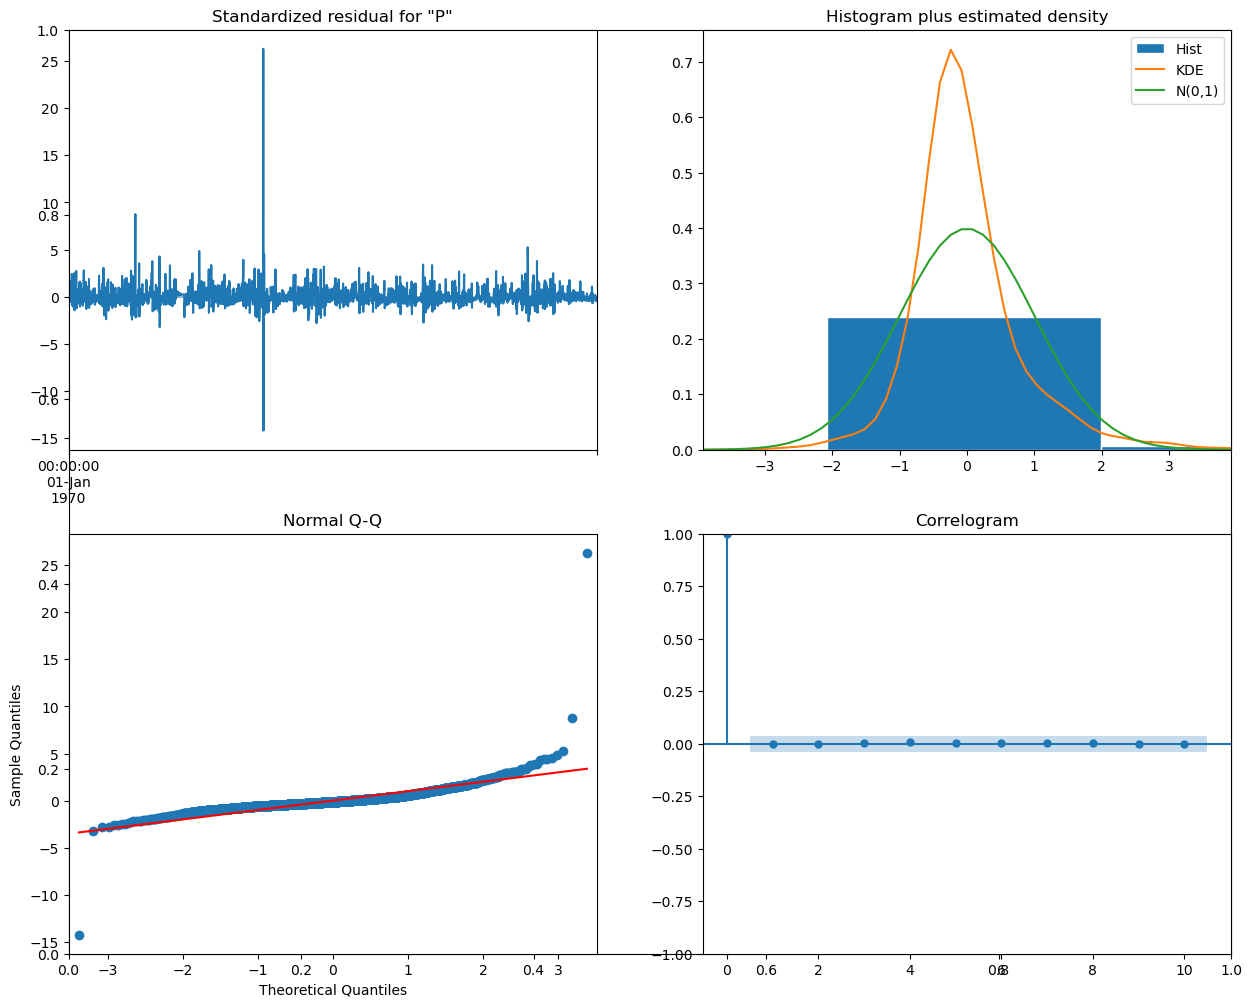

In [23]:
#diagnostic plot
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)


In [26]:
y_pred_wfv = pd.Series(dtype=float)
history = y_train.copy()

for i in range(len(y_test)):
    model = ARIMA(history, order=(8, 0, 1)).fit()
    next_pred = model.forecast()
    y_pred_wfv = pd.concat([y_pred_wfv, next_pred])
    history = pd.concat([history, y_test.iloc[[i]]])



/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/pulkitchauhan/tensorflow1/env/lib/python3.10/site-packages/statsmodels/tsa/ba

In [34]:
# CORRECTED PLOTTING CELL

# Create a DataFrame for plotting. 
# Reset index of y_test to align with the predictions.
# Use .squeeze() to ensure data is 1D.
df_predictions = pd.DataFrame({
    "y_test": y_test.squeeze().reset_index(drop=True),
    "y_pred_wfv": y_pred_wfv
})

# Plot the aligned data
fig = px.line(df_predictions, labels={"value": "P2", "variable": "Source"}, title="Walk-Forward Validation: Actual vs. Predicted")
fig.show()